# DBSCAN spatial clustering on weather data by `Mr. Harshit Dawar`!
* It stands for Density Based Spatial clustering of applications with Noise.
* It works based on density of points in a particular radius.
* It is one of the most commonly used algorithms.
* It has 2 parameters on which it works:
  * Radius: It is the radius of the neirhborhood, if it includes enough points then it is known as Dense Area.
  * Minimum number of neighbors: These are the min. no. of points that should be present in the radius to define a cluster.

## Importing the libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
import seaborn as sns

## Downlaoding the dataset!

In [2]:
!wget -O weather-stations20140101-20141231.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv

--2020-05-31 02:19:22--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129821 (127K) [text/csv]
Saving to: ‘weather-stations20140101-20141231.csv’

weather-stations201 100%[===================>] 126.78K  85.2KB/s    in 1.5s    

2020-05-31 02:19:26 (85.2 KB/s) - ‘weather-stations20140101-20141231.csv’ saved [129821/129821]



## Loading the dataset

In [3]:
data = pd.read_csv("weather-stations20140101-20141231.csv")

### DataSet Description
* Name: in the table	Meaning
* Stn_Name:	Station Name
* Lat:	Latitude (North+, degrees)
* Long:	Longitude (West - , degrees)
* Prov:	Province
* Tm:	Mean Temperature (°C)
* DwTm:	Days without Valid Mean Temperature
* D	Mean: Temperature difference from Normal (1981-2010) (°C)
* Tx:	Highest Monthly Maximum Temperature (°C)
* DwTx:	Days without Valid Maximum Temperature
* Tn:	Lowest Monthly Minimum Temperature (°C)
* DwTn:	Days without Valid Minimum Temperature
* S:	Snowfall (cm)
* DwS:	Days without Valid Snowfall
* S%N:	Percent of Normal (1981-2010) Snowfall
* P:	Total Precipitation (mm)
* DwP:	Days without Valid Precipitation
* nP%N:	Percent of Normal (1981-2010) Precipitation
* S_G:	Snow on the ground at the end of the month (cm)
* Pd:	Number of days with Precipitation 1.0 mm or more
* BS:	Bright Sunshine (hours)
* DwBS:	Days without Valid Bright Sunshine
* BS%:	Percent of Normal (1981-2010) Bright Sunshine
* HDD:	Degree Days below 18 °C
* CDD:	Degree Days above 18 °C
* Stn_No:	Climate station identifier (first 3 digits indicate drainage basin, last 4 characters are for sorting alphabetically).
* NA:	Not Availabl8

In [4]:
data.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [5]:
data.shape

(1341, 25)

In [6]:
data.describe()

,Lat,Long,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,...,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD
count,1341.000000,1341.000000,1256.000000,1256.000000,357.000000,1260.000000,1260.000000,1260.000000,1260.000000,586.000000,...,1227.000000,1227.000000,209.000000,798.000000,1227.000000,0.0,0.0,0.0,1256.000000,1256.0
mean,51.185221,-96.670827,-12.062341,2.186306,-2.768908,2.612302,1.814286,-26.322381,1.816667,35.219966,...,50.402363,2.612062,118.368421,31.325815,7.480033,NaN,NaN,NaN,773.277150,0.0
std,6.216434,23.285512,10.416366,4.903077,4.840769,8.855823,4.249613,12.573066,4.438321,39.575586,...,62.312551,4.889425,64.527522,33.799751,4.740601,NaN,NaN,NaN,311.119277,0.0
min,41.949000,-140.868000,-38.200000,0.000000,-12.000000,-29.800000,0.000000,-49.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,26.000000,0.0
25%,46.983000,-116.501000,-18.500000,0.000000,-7.100000,-3.500000,0.000000,-35.425000,0.000000,9.000000,...,13.200000,0.000000,75.000000,2.000000,4.000000,NaN,NaN,NaN,560.100000,0.0
50%,49.850000,-101.400000,-13.800000,0.000000,-4.600000,2.500000,0.000000,-29.100000,0.000000,25.000000,...,27.100000,0.000000,104.000000,26.000000,7.000000,NaN,NaN,NaN,813.500000,0.0
75%,53.283000,-73.750000,-5.600000,2.000000,2.700000,10.000000,1.000000,-21.700000,1.000000,49.875000,...,60.500000,3.000000,147.000000,45.000000,11.000000,NaN,NaN,NaN,988.000000,0.0
max,82.500000,-52.753000,9.600000,27.000000,7.800000,22.000000,27.000000,5.300000,27.000000,245.000000,...,516.800000,27.000000,400.000000,253.000000,28.000000,NaN,NaN,NaN,1523.400000,0.0


## Data Preprocessing

In [7]:
data.isna().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

In [8]:
data["Tm"].fillna(data["Tm"].mean(), inplace = True)

In [9]:
data.isna().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm             0
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

In [10]:
data.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.200000,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.000000,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.800000,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,-12.062341,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.700000,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [11]:
data.dtypes

Stn_Name     object
Lat         float64
Long        float64
Prov         object
Tm          float64
DwTm        float64
D           float64
Tx          float64
DwTx        float64
Tn          float64
DwTn        float64
S           float64
DwS         float64
S%N         float64
P           float64
DwP         float64
P%N         float64
S_G         float64
Pd          float64
BS          float64
DwBS        float64
BS%         float64
HDD         float64
CDD         float64
Stn_No       object
dtype: object

In [12]:
missing_values_columns = list(data.drop(["Stn_Name", "Prov", "Stn_No"], axis = 1).columns)

In [146]:
# missing_values_columns

In [83]:
si = SimpleImputer(strategy="mean")
si2 = SimpleImputer(strategy="mean")

In [141]:
a = ['D', 'Tx','DwTx','Tn', 'DwTn', 'S', 'DwS', 'S%N', 'P', 'DwP','P%N','Tm', 'DwTm', 'S_G', 'Pd','HDD','CDD']

In [161]:
transformer = ColumnTransformer(transformers=[
    ("FillingMissingValues", si, a)],
                               remainder = "passthrough",
                                verbose = True
                               )
transformed_data = transformer.fit_transform(data)

[ColumnTransformer]  (1 of 2) Processing FillingMissingValues, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


In [162]:
col = list(missing_values_columns)
col.insert(0, "Stn_Name")
col.insert(1, "Prov")
col.append("Stn_No")

In [163]:
transformed_data = pd.DataFrame(transformed_data, columns=col)

In [164]:
transformed_data.head()

,Stn_Name,Prov,Lat,Long,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,-2.76891,13.5,0,1,0,0,0,105.904,178.8,0,...,273.3,0,CHEMAINUS,48.935,-123.742,BC,NaN,NaN,NaN,1011500
1,3,15,0,-3,0,0,0,0,258.6,0,...,307,0,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,NaN,NaN,NaN,1012040
2,2.8,16,9,-2.5,9,0,9,105.904,264.6,9,...,168.1,0,LAKE COWICHAN,48.829,-124.052,BC,NaN,NaN,NaN,1012055
3,-2.76891,12.5,0,-26.3224,1.81667,35.22,2.5273,105.904,50.4024,2.61206,...,773.277,0,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,1012475
4,3.4,14.5,2,-1,2,0,2,105.904,168.4,2,...,267.7,0,DUNCAN KELVIN CREEK,48.735,-123.728,BC,NaN,NaN,NaN,1012573


In [165]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Stn_Name  1341 non-null   object
 1   Prov      1341 non-null   object
 2   Lat       1341 non-null   object
 3   Long      1341 non-null   object
 4   Tm        1341 non-null   object
 5   DwTm      1341 non-null   object
 6   D         1341 non-null   object
 7   Tx        1341 non-null   object
 8   DwTx      1341 non-null   object
 9   Tn        1341 non-null   object
 10  DwTn      1341 non-null   object
 11  S         1341 non-null   object
 12  DwS       1341 non-null   object
 13  S%N       1341 non-null   object
 14  P         1341 non-null   object
 15  DwP       1341 non-null   object
 16  P%N       1341 non-null   object
 17  S_G       1341 non-null   object
 18  Pd        1341 non-null   object
 19  BS        1341 non-null   object
 20  DwBS      1341 non-null   object
 21  BS%       0 no

In [166]:
transformed_data.dropna(inplace=True, axis = 1)

In [167]:
transformed_data.isna().sum().sum()

0

In [168]:
transformed_data

,Stn_Name,Prov,Lat,Long,Tm,DwTm,D,Tx,DwTx,Tn,...,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,Stn_No
0,-2.76891,13.5,0,1,0,0,0,105.904,178.8,0,...,0,0,12,273.3,0,CHEMAINUS,48.935,-123.742,BC,1011500
1,3,15,0,-3,0,0,0,0,258.6,0,...,0,0,12,307,0,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,1012040
2,2.8,16,9,-2.5,9,0,9,105.904,264.6,9,...,13,31.3258,11,168.1,0,LAKE COWICHAN,48.829,-124.052,BC,1012055
3,-2.76891,12.5,0,-26.3224,1.81667,35.22,2.5273,105.904,50.4024,2.61206,...,2.18631,31.3258,7.48003,773.277,0,DISCOVERY ISLAND,48.425,-123.226,BC,1012475
4,3.4,14.5,2,-1,2,0,2,105.904,168.4,2,...,2,31.3258,11,267.7,0,DUNCAN KELVIN CREEK,48.735,-123.728,BC,1012573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,-5.2,-6.8,0,-33.5,0,55.2,1,105.904,46.6,0,...,0,74,5,1136.5,0,NAIN A,56.55,-61.683,NL,8502800
1337,-2.76891,-7.5,17,-26.3224,1.81667,35.22,2.5273,105.904,25.2,17,...,24,31.3258,4,148.7,0,NAIN A,56.551,-61.682,NL,8502801
1338,-2.76891,-13.5,1,-32.3,1,35.22,2.5273,105.904,50.4024,2.61206,...,2,31.3258,7.48003,1101.2,0,SAGLEK,58.333,-62.586,NL,8503249
1339,-2.76891,-5.8,1,-32.5,1,35.22,2.5273,105.904,50.4024,2.61206,...,2,31.3258,7.48003,1060,0,TUKIALIK BAY,54.716,-58.358,NL,8503992


In [177]:
import os
os.environ["PROJ_LIB"] = "/opt/anaconda3/pkgs/proj4-5.2.0-h0a44026_1/share/proj/"
from mpl_toolkits.basemap import Basemap

In [179]:
transformed_data["Lat"].max()

27.0

In [180]:
min_longitude, max_longitude, min_latitude, max_latitude = transformed_data["Long"].min(),  transformed_data["Long"].max(),  transformed_data["Lat"].min(),  transformed_data["Lat"].max()

In [182]:
min_latitude, max_latitude, min_longitude, max_longitude

(0.0, 27.0, -49.7, 5.3)

In [289]:
x.min(), x.max(), transformed_data["Long"].max()

(0.0, 6115718.085657465, 5.3)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


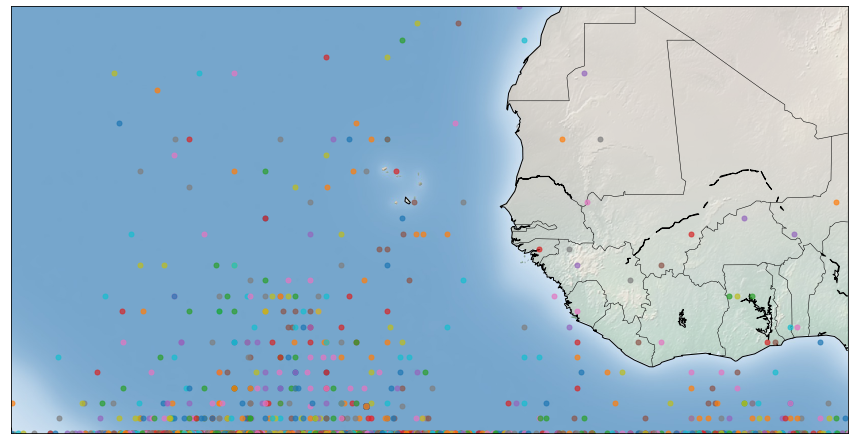

In [288]:
Display_Map = Basemap(
                llcrnrlat =  min_latitude,
                llcrnrlon = min_longitude,
                urcrnrlat = max_latitude,
                urcrnrlon = max_longitude,
                projection="merc",
                resolution="l",
                area_thresh=1000.0
)

# from pylab import rcParams
# rcParams['figure.figsize'] = (14,10)
plt.figure(figsize=(15,9))
Display_Map.drawcoastlines()
Display_Map.drawcountries()
Display_Map.fillcontinents(color="White", alpha=0.5)
Display_Map.shadedrelief()
x, y = Display_Map(np.asarray(transformed_data.Long), np.asarray(transformed_data.Lat))
for i, j in zip(x, y):
    Display_Map.plot(i, j, marker = ".", markersize = 10, alpha = 0.7)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


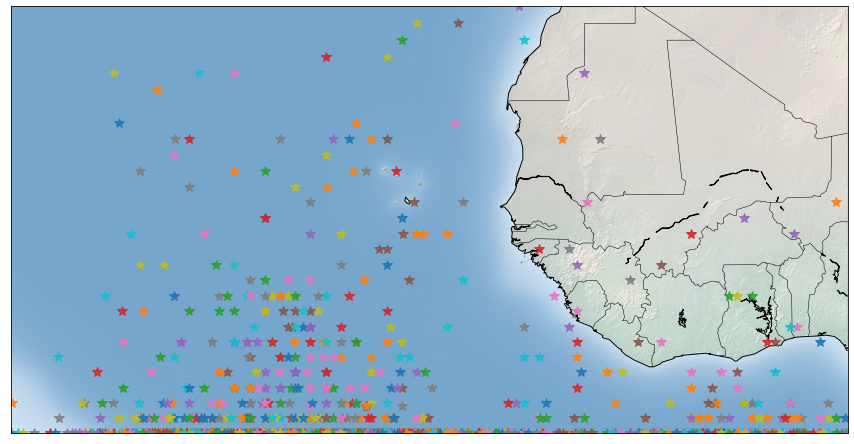

In [291]:
Display_Map = Basemap(
                llcrnrlat =  min_latitude,
                llcrnrlon = min_longitude,
                urcrnrlat = max_latitude,
                urcrnrlon = max_longitude,
                projection="merc",
                resolution="l",
                area_thresh=1000.0
)

# from pylab import rcParams
# rcParams['figure.figsize'] = (14,10)
plt.figure(figsize=(15,9))
Display_Map.drawcoastlines()
Display_Map.drawcountries()
Display_Map.fillcontinents(color="White", alpha=0.5)
Display_Map.shadedrelief()
x, y = Display_Map(np.asarray(transformed_data.Long), np.asarray(transformed_data.Lat))


transformed_data["TLAT"] = y.tolist()
transformed_data["TLONG"] = x.tolist()

for index, row in transformed_data.iterrows():
    Display_Map.plot(row.TLONG, row.TLAT, marker = "*", markersize = 10, alpha = 0.9)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


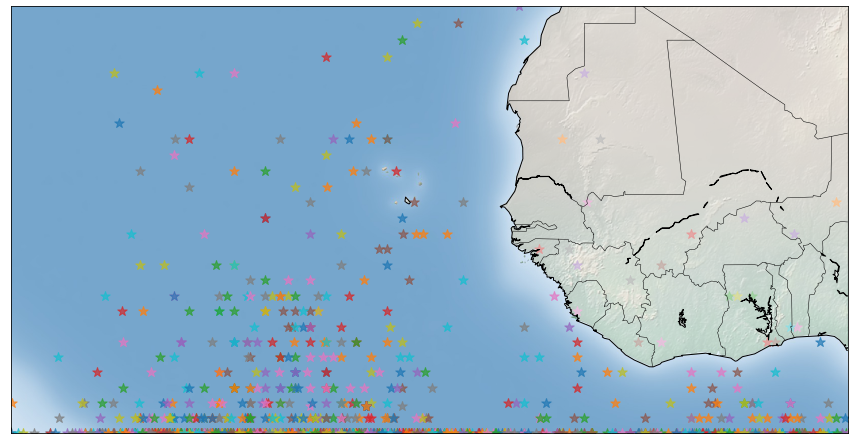

In [284]:
Display_Map = Basemap(
                llcrnrlat =  min_latitude,
                llcrnrlon = min_longitude,
                urcrnrlat = max_latitude,
                urcrnrlon = max_longitude,
                projection="merc",
                resolution="l",
                area_thresh=1000.0
)

# from pylab import rcParams
# rcParams['figure.figsize'] = (14,10)
plt.figure(figsize=(15,9))
Display_Map.drawcoastlines()
Display_Map.drawcountries()
Display_Map.fillcontinents(color="White", alpha=0.5)
Display_Map.shadedrelief()
x, y = Display_Map(np.asarray(transformed_data["Long"]), np.asarray(transformed_data["Lat"]))
for i, j in zip(x, y):
    Display_Map.scatter(i, j, marker = "*", s = 100, alpha = 0.7)
plt.show()

In [292]:
transformed_data

,Stn_Name,Prov,Lat,Long,Tm,DwTm,D,Tx,DwTx,Tn,...,P,DwP,P%N,S_G,Pd,BS,DwBS,Stn_No,TLAT,TLONG
0,-2.76891,13.5,0,1,0,0,0,105.904,178.8,0,...,12,273.3,0,CHEMAINUS,48.935,-123.742,BC,1011500,0.000000e+00,5.637580e+06
1,3,15,0,-3,0,0,0,0,258.6,0,...,12,307,0,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,1012040,0.000000e+00,5.192801e+06
2,2.8,16,9,-2.5,9,0,9,105.904,264.6,9,...,11,168.1,0,LAKE COWICHAN,48.829,-124.052,BC,1012055,1.004895e+06,5.248398e+06
3,-2.76891,12.5,0,-26.3224,1.81667,35.22,2.5273,105.904,50.4024,2.61206,...,7.48003,773.277,0,DISCOVERY ISLAND,48.425,-123.226,BC,1012475,0.000000e+00,2.599471e+06
4,3.4,14.5,2,-1,2,0,2,105.904,168.4,2,...,11,267.7,0,DUNCAN KELVIN CREEK,48.735,-123.728,BC,1012573,2.224349e+05,5.415190e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,-5.2,-6.8,0,-33.5,0,55.2,1,105.904,46.6,0,...,5,1136.5,0,NAIN A,56.55,-61.683,NL,8502800,0.000000e+00,1.801357e+06
1337,-2.76891,-7.5,17,-26.3224,1.81667,35.22,2.5273,105.904,25.2,17,...,4,148.7,0,NAIN A,56.551,-61.682,NL,8502801,1.918675e+06,2.599471e+06
1338,-2.76891,-13.5,1,-32.3,1,35.22,2.5273,105.904,50.4024,2.61206,...,7.48003,1101.2,0,SAGLEK,58.333,-62.586,NL,8503249,1.112005e+05,1.934791e+06
1339,-2.76891,-5.8,1,-32.5,1,35.22,2.5273,105.904,50.4024,2.61206,...,7.48003,1060,0,TUKIALIK BAY,54.716,-58.358,NL,8503992,1.112005e+05,1.912552e+06


## Clustering based on the Latitude & Longitude

In [245]:
Cluster_Data = []
for i, j in zip(x.tolist(), y.tolist()):
    Cluster_Data.append([i, j])

In [293]:
Cluster_Data = np.nan_to_num(Cluster_Data)
Cluster_Data = MinMaxScaler().fit_transform(Cluster_Data)

In [295]:
Cluster_Data, Cluster_Data.shape

(array([[0.92181818, 0.        ],
        [0.84909091, 0.        ],
        [0.85818182, 0.32208425],
        ...,
        [0.31636364, 0.03564148],
        [0.31272727, 0.03564148],
        [0.05272727, 0.        ]]),
 (1341, 2))

In [262]:
density_based_clustering = DBSCAN(eps=0.05, min_samples=5)
density_based_clustering.fit(Cluster_Data)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [263]:
np.unique(density_based_clustering.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([  78, 1240,    5,    8,    3,    7]))

In [264]:
# Return the indexes where label != -1
density_based_clustering.core_sample_indices_

array([   0,    1,    3, ..., 1338, 1339, 1340])

In [274]:
# Create a numpy array of zeros having same dimensions as labels of boolean type
core_samples_mask = np.zeros_like(density_based_clustering.labels_, dtype=bool)

# Make the Boolean values to Ture where label != -1, or we can say when there are not outliers
core_samples_mask[density_based_clustering.core_sample_indices_] = True

# Assigning Labels
labels = density_based_clustering.labels_

In [275]:
core_samples_mask[100:150]

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [278]:
density_based_clustering.labels_[1], density_based_clustering.labels_[2]

(0, -1)

In [279]:
Actual_Clusters_Number_With_Outliers = len(set(labels)) - (1 if -1 in labels else 0)
Total_Clusters = len(set(labels)) 

In [281]:
Actual_Clusters_Number_With_Outliers, Total_Clusters

(5, 6)

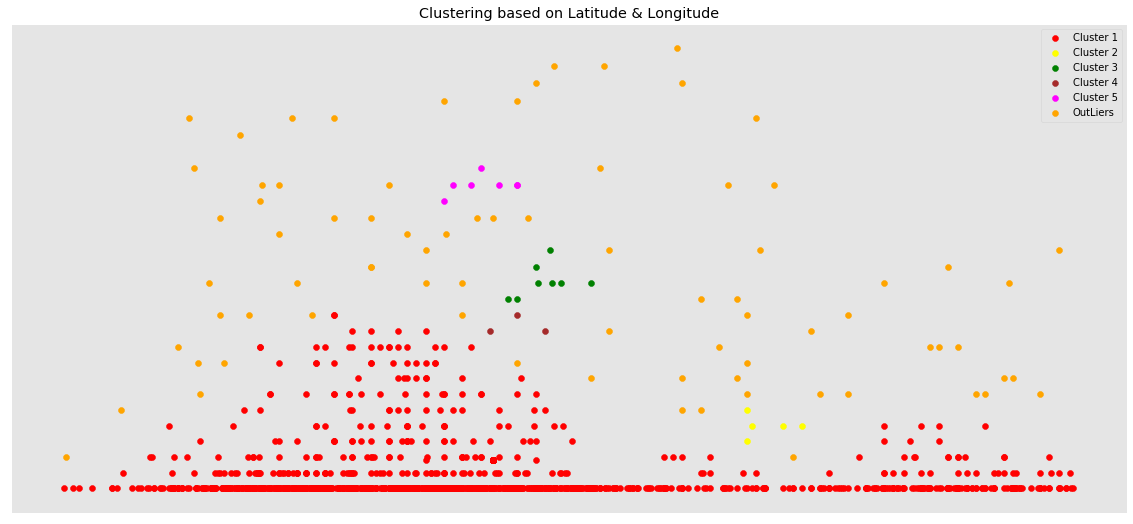

In [311]:
plt.style.use("ggplot")
plt.figure(figsize=(20,9))

plt.scatter(Cluster_Data[density_based_clustering.labels_ == 0, 0],
            Cluster_Data[density_based_clustering.labels_ == 0, 1],
            c = "red",
           label = "Cluster 1")

plt.scatter(Cluster_Data[density_based_clustering.labels_ == 1, 0],
            Cluster_Data[density_based_clustering.labels_ == 1, 1],
            c = "yellow",
           label = "Cluster 2")

plt.scatter(Cluster_Data[density_based_clustering.labels_ == 2, 0],
            Cluster_Data[density_based_clustering.labels_ == 2, 1],
            c = "green",
           label = "Cluster 3")

plt.scatter(Cluster_Data[density_based_clustering.labels_ == 3, 0],
            Cluster_Data[density_based_clustering.labels_ == 3, 1],
            c = "brown",
           label = "Cluster 4")

plt.scatter(Cluster_Data[density_based_clustering.labels_ == 4, 0],
            Cluster_Data[density_based_clustering.labels_ == 4, 1],
            c = "magenta",
           label = "Cluster 5")

plt.scatter(Cluster_Data[density_based_clustering.labels_ == -1, 0],
            Cluster_Data[density_based_clustering.labels_ == -1, 1],
            c = "orange",
           label = "OutLiers")

plt.legend()
plt.title("Clustering based on Latitude & Longitude")
plt.xticks([])
plt.yticks([])
plt.show()

## Clustering based on the locaion, mean, max & min Temperature

In [313]:
ClusterData2 = transformed_data[['TLAT','TLONG','Tx','Tm','Tn']]

In [385]:
ClusterData2.head()

,TLAT,TLONG,Tx,Tm,Tn
0,0.000000e+00,5.637580e+06,105.904,0,0
1,0.000000e+00,5.192801e+06,0,0,0
2,1.004895e+06,5.248398e+06,105.904,9,9
3,0.000000e+00,2.599471e+06,105.904,1.81667,2.61206
4,2.224349e+05,5.415190e+06,105.904,2,2


## Scaling the Data, otherwise, cluster formation will be full of errors, as there is complete mismatch of range of data in columns

In [419]:
ClusterData2 = MinMaxScaler().fit_transform(ClusterData2)
ClusterData2

array([[0.        , 0.92181818, 0.23275613, 0.        , 0.        ],
       [0.        , 0.84909091, 0.        , 0.        , 0.        ],
       [0.32208425, 0.85818182, 0.23275613, 0.33333333, 0.33333333],
       ...,
       [0.03564148, 0.31636364, 0.23275613, 0.03703704, 0.09674303],
       [0.03564148, 0.31272727, 0.23275613, 0.03703704, 0.09674303],
       [0.        , 0.05272727, 0.23275613, 0.        , 0.        ]])

## Initializing Density Based Clustering

In [396]:
density_based_clustering2 = DBSCAN(eps=0.1, min_samples = 5)
density_based_clustering2.fit(ClusterData2)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

### Finding out the unique values

In [397]:
np.unique(density_based_clustering2.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([ 137, 1177,    5,    9,    4,    5,    4]))

In [398]:
# Create a numpy array of zeros having same dimensions as labels of boolean type
core_samples_mask = np.zeros_like(density_based_clustering2.labels_, dtype=bool)

# Make the Boolean values to Ture where label != -1, or we can say when there are not outliers
core_samples_mask[density_based_clustering2.core_sample_indices_] = True

# Assigning Labels
labels = density_based_clustering2.labels_
labels.shape

(1341,)

In [399]:
Actual_Clusters_Number_With_Outliers = len(set(labels)) - (1 if -1 in labels else 0)
Total_Clusters = len(set(labels)) 
Actual_Clusters_Number_With_Outliers, Total_Clusters

(6, 7)

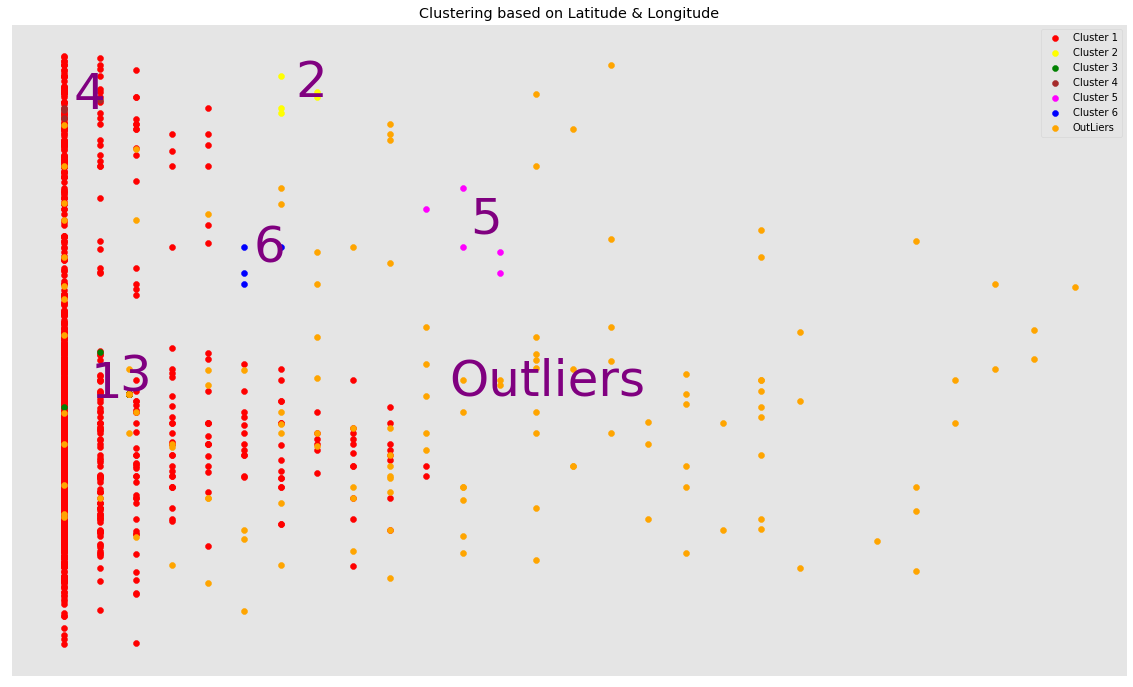

In [418]:
plt.style.use("ggplot")
plt.figure(figsize=(20, 12))


# Plotting cluster 1
plt.scatter(ClusterData2[labels == 0, 0],
            ClusterData2[labels == 0, 1],
            c = "red",
           label = "Cluster 1")

center_of_x = ClusterData2[labels == 0, 0].mean()
center_of_y = ClusterData2[labels == 0, 1].mean()

plt.text(center_of_x,
         center_of_y,
        "1",
        fontsize = 50,
        color = "Purple")


# Plotting cluster 2
plt.scatter(ClusterData2[labels == 1, 0],
            ClusterData2[labels == 1, 1],
            c = "yellow",
           label = "Cluster 2")

center_of_x = ClusterData2[labels == 1, 0].mean()
center_of_y = ClusterData2[labels == 1, 1].mean()

plt.text(center_of_x,
         center_of_y,
        "2",
        fontsize = 50,
        color = "Purple")


# Plotting cluster 3
plt.scatter(ClusterData2[labels == 2, 0],
            ClusterData2[labels == 2, 1],
            c = "green",
           label = "Cluster 3")

center_of_x = ClusterData2[labels == 2, 0].mean()
center_of_y = ClusterData2[labels == 2, 1].mean()

plt.text(center_of_x,
         center_of_y,
        "3",
        fontsize = 50,
        color = "Purple")


# Plotting cluster 4
plt.scatter(ClusterData2[labels == 3, 0],
            ClusterData2[labels == 3, 1],
            c = "brown",
           label = "Cluster 4")

center_of_x = ClusterData2[labels == 3, 0].mean()
center_of_y = ClusterData2[labels == 3, 1].mean()

plt.text(center_of_x,
         center_of_y,
        "4",
        fontsize = 50,
        color = "Purple")


# Plotting cluster 5
plt.scatter(ClusterData2[labels == 4, 0],
            ClusterData2[labels == 4, 1],
            c = "magenta",
           label = "Cluster 5")

center_of_x = ClusterData2[labels == 4, 0].mean()
center_of_y = ClusterData2[labels == 4, 1].mean()

plt.text(center_of_x,
         center_of_y,
        "5",
        fontsize = 50,
        color = "Purple")


# Plotting cluster 6
plt.scatter(ClusterData2[labels == 5, 0],
            ClusterData2[labels == 5, 1],
            c = "blue",
           label = "Cluster 6")

center_of_x = ClusterData2[labels == 5, 0].mean()
center_of_y = ClusterData2[labels == 5, 1].mean()

plt.text(center_of_x,
         center_of_y,
        "6",
        fontsize = 50,
        color = "Purple")

# Plotting Outliers cluster
plt.scatter(ClusterData2[labels == -1, 0],
            ClusterData2[labels == -1, 1],
            c = "orange",
           label = "OutLiers")

center_of_x = ClusterData2[labels == -1, 0].mean()
center_of_y = ClusterData2[labels == -1, 1].mean()

plt.text(center_of_x,
         center_of_y,
        "Outliers",
        fontsize = 50,
        color = "Purple")

plt.legend()
plt.title("Clustering based on Latitude & Longitude")
plt.xticks([])
plt.yticks([])
plt.show()

In [347]:
ClusterData2.head()

,TLAT,TLONG,Tx,Tm,Tn
0,0.000000e+00,5.637580e+06,105.904,0,0
1,0.000000e+00,5.192801e+06,0,0,0
2,1.004895e+06,5.248398e+06,105.904,9,9
3,0.000000e+00,2.599471e+06,105.904,1.81667,2.61206
4,2.224349e+05,5.415190e+06,105.904,2,2


In [357]:
ClusterData2.values

array([[0.0, 5637580.1262333365, 105.9040404040404, 0.0, 0.0],
       [0.0, 5192800.629094612, 0.0, 0.0, 0.0],
       [1004894.8733383685, 5248398.066236952, 105.9040404040404, 9.0,
        9.0],
       ...,
       [111200.52003058406, 1934790.8125534533, 105.9040404040404, 1.0,
        2.6120619396903018],
       [111200.52003058406, 1912551.8376965167, 105.9040404040404, 1.0,
        2.6120619396903018],
       [0.0, 322465.13542557607, 105.9040404040404, 0.0, 0.0]],
      dtype=object)

In [401]:
ClusterData2[0]

array([0.        , 0.92181818, 0.23275613, 0.        , 0.        ])

In [410]:
ClusterData2[labels == 0, 0].mean()

0.026184535458604143